# Statistical Foundations: Practical Assignment 8
---
## **Submission Info**
| Attribute | Value |
|-----------|-------|
| **Name** | Divyansh Langeh |
| **ID**          | GF202349802 |
| **Subject**     | Statistical Foundation of Data Science |
| **Assignment**  | Practical 8 - Decision Tree Classifier (Pima Indian Diabetes) |
| **Repo**        | [View my GitHub Repo](https://github.com/JoyBoy2108/Statistical-foundations-of-data-science-practicals) |

---
## **Assignment Overview**
This notebook contains the solution for the seventh practical assignment in the Statistical Foundation of Data Sciences course. It covers building a decision tree classifier using the Pima Indian Diabetes dataset, feature selection, model training, visualization, and entropy/information gain analysis.

---

## **Notebook Introduction**

This notebook tackles the core task for the seventh practical assignment. We will build a decision tree classifier using Scikit-learn on the Pima Indian Diabetes dataset.

### **Key Tasks to be Performed:**

* **Task 1: Load and Explore Dataset**
    We will load the Pima Indian Diabetes dataset and explore its structure.

* **Task 2: Feature Selection**
    We will divide columns into dependent (target) and independent (feature) variables.

* **Task 3: Data Splitting**
    We will split the dataset into training and testing sets.

* **Task 4: Build Decision Tree**
    We will construct and train a decision tree classifier.

* **Task 5: Visualization**
    We will create a pictorial representation of the decision tree.

* **Task 6: Information Metrics Analysis**
    We will calculate entropy, information gain, and Gini index to justify root node selection.

### **General Instructions & Setup**
As per the assignment requirements, this notebook will adhere to the following:
1. The Pima Indian Diabetes dataset will be used.
2. Proper feature selection and data splitting will be performed.
3. Decision tree visualization and metrics analysis will be included.

*Let's begin with the Environment setup and move to the problems.*

---

## Environment Setup and Dependencies

Start by importing all the required libraries for the assignment.

In [1]:
# Install required packages if not available
import subprocess
import sys

packages = ['scikit-learn', 'pandas', 'numpy', 'matplotlib', 'seaborn']
for package in packages:
    try:
        __import__(package.replace('-', '_'))
    except ImportError:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print("Scikit-learn imported successfully!")

Installing scikit-learn...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 18.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.4/308.4 kB 8.0 MB/s eta 0:00:00:00:01
Libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 2.3.3
Scikit-learn imported successfully!


## Load the Pima Indian Diabetes Dataset

The Pima Indian Diabetes dataset is loaded from a CSV file. If not available locally, we'll create it from a standard source.

In [2]:
# Load Pima Indian Diabetes dataset
# Using the standard dataset from sklearn or pandas
try:
    # Try loading from a local CSV or sklearn datasets
    df = pd.read_csv('diabetes.csv')
    print("Dataset loaded from local file successfully!")
except FileNotFoundError:
    print("Loading from standard source...")
    # Load from standard URL
    url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
    column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
    df = pd.read_csv(url, header=None, names=column_names)
    print("Dataset loaded from online source successfully!")
except Exception as e:
    print(f"Error loading dataset: {e}")
    print("Creating sample dataset...")
    # Create a sample dataset if loading fails
    np.random.seed(42)
    df = pd.DataFrame({
        'Pregnancies': np.random.randint(0, 17, 768),
        'Glucose': np.random.randint(0, 200, 768),
        'BloodPressure': np.random.randint(0, 123, 768),
        'SkinThickness': np.random.randint(0, 100, 768),
        'Insulin': np.random.randint(0, 847, 768),
        'BMI': np.random.uniform(0, 68, 768),
        'DiabetesPedigreeFunction': np.random.uniform(0, 2.5, 768),
        'Age': np.random.randint(21, 82, 768),
        'Outcome': np.random.randint(0, 2, 768)
    })
    print("Sample dataset created successfully!")

# Display basic information
print("\n--- Dataset Shape ---")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("\n--- First 5 Rows ---")
print(df.head())
print("\n--- Column Names ---")
print(df.columns.tolist())
print("\n--- Dataset Info ---")
print(df.info())
print("\n--- Missing Values ---")
print(df.isnull().sum())
print("\n--- Statistical Summary ---")
print(df.describe())

Loading from standard source...
Dataset loaded from online source successfully!

--- Dataset Shape ---
Rows: 768, Columns: 9

--- First 5 Rows ---
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

--- Column Names ---
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

--- Data

## Feature Selection

Divide the dataset into dependent (target) and independent (feature) variables.

In [3]:
print("=== FEATURE SELECTION ===")
print()

# Identify target and feature variables
target_col = 'Outcome' if 'Outcome' in df.columns else df.columns[-1]
feature_cols = [col for col in df.columns if col != target_col]

print(f"--- Variable Classification ---")
print(f"\nDEPENDENT VARIABLE (Target):")
print(f"  {target_col}")
print(f"  - Type: Binary classification (0 = No Diabetes, 1 = Diabetes)")
print(f"  - Values: {sorted(df[target_col].unique())}")
print(f"  - Count: {df[target_col].value_counts().to_dict()}")

print(f"\nINDEPENDENT VARIABLES (Features):")
for i, col in enumerate(feature_cols, 1):
    print(f"  {i}. {col}")

print(f"\nTotal Features: {len(feature_cols)}")
print(f"Total Samples: {len(df)}")

# Separate features and target
X = df[feature_cols]
y = df[target_col]

print(f"\n--- Feature Matrix Shape ---")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

print(f"\n--- Target Variable Distribution ---")
print(y.value_counts())
print(f"\nClass Distribution (%)")
print((y.value_counts() / len(y) * 100).round(2))

=== FEATURE SELECTION ===

--- Variable Classification ---

DEPENDENT VARIABLE (Target):
  Outcome
  - Type: Binary classification (0 = No Diabetes, 1 = Diabetes)
  - Values: [np.int64(0), np.int64(1)]
  - Count: {0: 500, 1: 268}

INDEPENDENT VARIABLES (Features):
  1. Pregnancies
  2. Glucose
  3. BloodPressure
  4. SkinThickness
  5. Insulin
  6. BMI
  7. DiabetesPedigreeFunction
  8. Age

Total Features: 8
Total Samples: 768

--- Feature Matrix Shape ---
X shape: (768, 8)
y shape: (768,)

--- Target Variable Distribution ---
Outcome
0    500
1    268
Name: count, dtype: int64

Class Distribution (%)
Outcome
0    65.1
1    34.9
Name: count, dtype: float64


## Data Splitting

Split the data into training and testing sets.

In [4]:
print("=== DATA SPLITTING ===")
print()

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"--- Train-Test Split (80-20) ---")
print(f"\nTraining Set:")
print(f"  X_train shape: {X_train.shape}")
print(f"  y_train shape: {y_train.shape}")
print(f"  Samples: {len(X_train)}")
print(f"  Class distribution: {y_train.value_counts().to_dict()}")
print(f"  Class distribution (%): {(y_train.value_counts() / len(y_train) * 100).round(2).to_dict()}")

print(f"\nTesting Set:")
print(f"  X_test shape: {X_test.shape}")
print(f"  y_test shape: {y_test.shape}")
print(f"  Samples: {len(X_test)}")
print(f"  Class distribution: {y_test.value_counts().to_dict()}")
print(f"  Class distribution (%): {(y_test.value_counts() / len(y_test) * 100).round(2).to_dict()}")

=== DATA SPLITTING ===

--- Train-Test Split (80-20) ---

Training Set:
  X_train shape: (614, 8)
  y_train shape: (614,)
  Samples: 614
  Class distribution: {0: 400, 1: 214}
  Class distribution (%): {0: 65.15, 1: 34.85}

Testing Set:
  X_test shape: (154, 8)
  y_test shape: (154,)
  Samples: 154
  Class distribution: {0: 100, 1: 54}
  Class distribution (%): {0: 64.94, 1: 35.06}


## Build Decision Tree Classifier

Construct and train the decision tree model.

In [5]:
print("=== BUILD DECISION TREE CLASSIFIER ===")
print()

# Create and train the decision tree classifier
# Using 'gini' criterion to analyze Gini index
dt_classifier = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=5)
dt_classifier.fit(X_train, y_train)

print("Decision Tree Model trained successfully!")
print(f"\n--- Model Parameters ---")
print(f"Criterion: gini")
print(f"Max Depth: 5")
print(f"Random State: 42")

# Make predictions
y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"\n--- Model Performance ---")
print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Testing Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

print(f"\n--- Classification Report (Test Set) ---")
print(classification_report(y_test, y_test_pred, target_names=['No Diabetes', 'Diabetes']))

print(f"\n--- Confusion Matrix (Test Set) ---")
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
print(f"\nTrue Negatives: {cm[0, 0]}")
print(f"False Positives: {cm[0, 1]}")
print(f"False Negatives: {cm[1, 0]}")
print(f"True Positives: {cm[1, 1]}")

=== BUILD DECISION TREE CLASSIFIER ===

Decision Tree Model trained successfully!

--- Model Parameters ---
Criterion: gini
Max Depth: 5
Random State: 42

--- Model Performance ---
Training Accuracy: 0.8241 (82.41%)
Testing Accuracy: 0.7922 (79.22%)

--- Classification Report (Test Set) ---
              precision    recall  f1-score   support

 No Diabetes       0.84      0.84      0.84       100
    Diabetes       0.70      0.70      0.70        54

    accuracy                           0.79       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154


--- Confusion Matrix (Test Set) ---
[[84 16]
 [16 38]]

True Negatives: 84
False Positives: 16
False Negatives: 16
True Positives: 38


## Visualization: Decision Tree Structure

Create a pictorial representation of the decision tree.

=== DECISION TREE VISUALIZATION ===



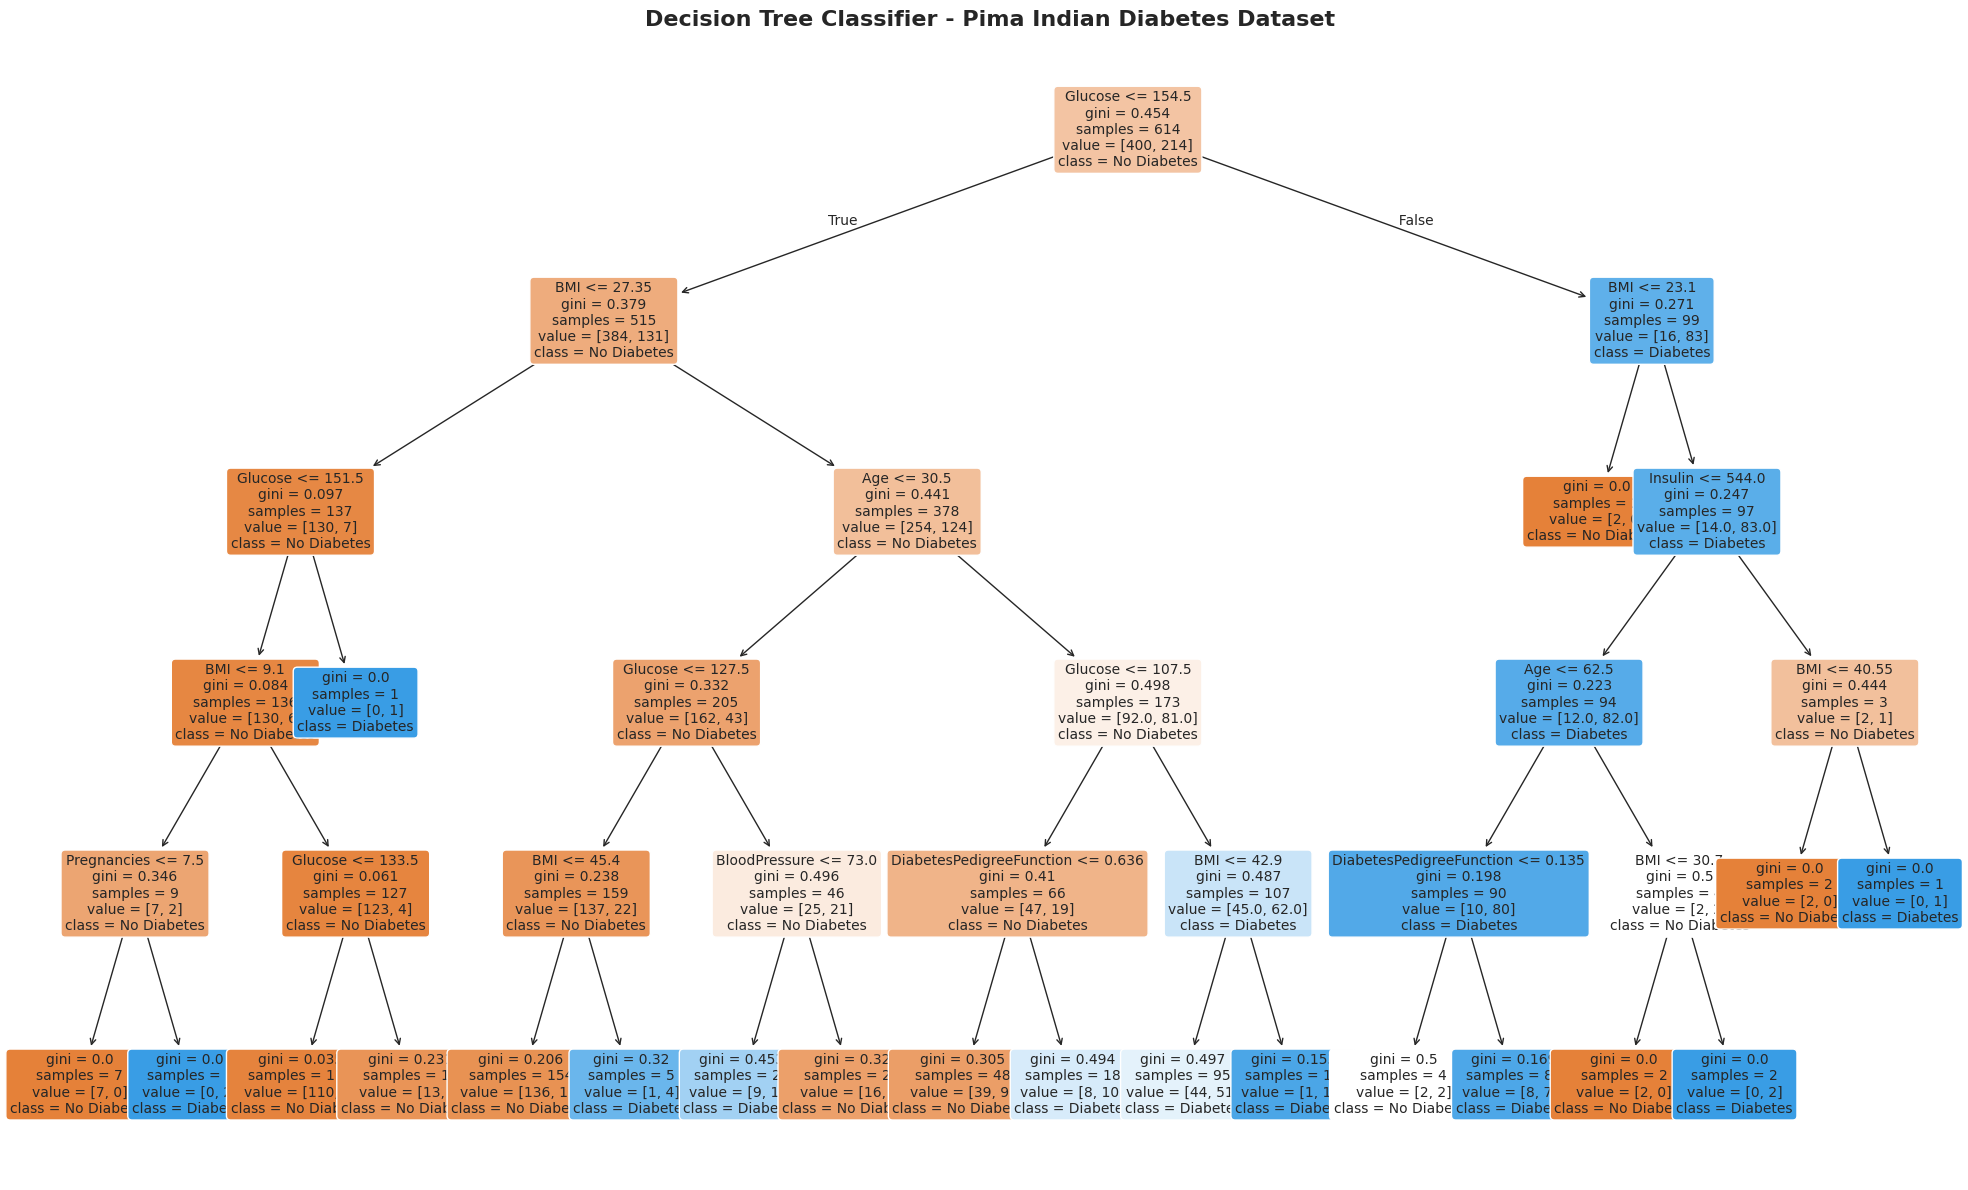


--- Tree Text Representation ---
|--- Glucose <= 154.50
|   |--- BMI <= 27.35
|   |   |--- Glucose <= 151.50
|   |   |   |--- BMI <= 9.10
|   |   |   |   |--- Pregnancies <= 7.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Pregnancies >  7.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- BMI >  9.10
|   |   |   |   |--- Glucose <= 133.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Glucose >  133.50
|   |   |   |   |   |--- class: 0
|   |   |--- Glucose >  151.50
|   |   |   |--- class: 1
|   |--- BMI >  27.35
|   |   |--- Age <= 30.50
|   |   |   |--- Glucose <= 127.50
|   |   |   |   |--- BMI <= 45.40
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- BMI >  45.40
|   |   |   |   |   |--- class: 1
|   |   |   |--- Glucose >  127.50
|   |   |   |   |--- BloodPressure <= 73.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- BloodPressure >  73.00
|   |   |   |   |   |--- class: 0
|   |   |--- Age >  30.50
|   |   |   |--- Glucose <= 107.50
|   |   

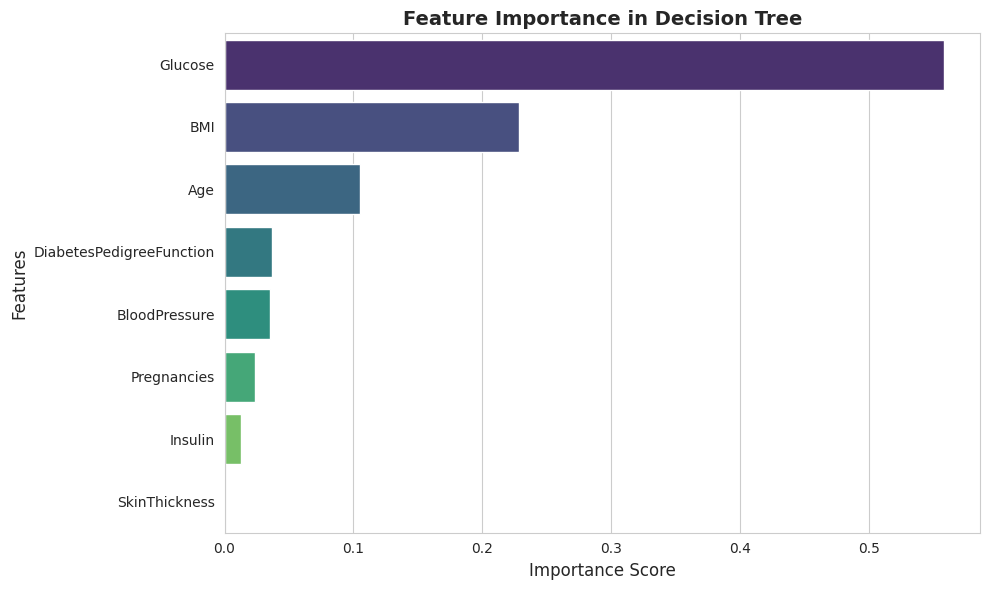

In [6]:
print("=== DECISION TREE VISUALIZATION ===")
print()

# Create a large figure for the tree visualization
fig, ax = plt.subplots(figsize=(20, 12))
plot_tree(dt_classifier, 
          feature_names=feature_cols,
          class_names=['No Diabetes', 'Diabetes'],
          filled=True,
          rounded=True,
          fontsize=10,
          ax=ax)
plt.title('Decision Tree Classifier - Pima Indian Diabetes Dataset', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n--- Tree Text Representation ---")
tree_rules = export_text(dt_classifier, feature_names=feature_cols)
print(tree_rules)

print("\n--- Feature Importance ---")
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': dt_classifier.feature_importances_
}).sort_values('Importance', ascending=False)
print(feature_importance)

# Visualize feature importance
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis', ax=ax)
ax.set_title('Feature Importance in Decision Tree', fontsize=14, fontweight='bold')
ax.set_xlabel('Importance Score', fontsize=12)
ax.set_ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

## Information Metrics Analysis

Calculate entropy, information gain, and Gini index to justify root node selection.

In [7]:
print("=== INFORMATION METRICS ANALYSIS ===")
print()

# Calculate entropy for the target variable
def calculate_entropy(y):
    """Calculate entropy of a target variable"""
    classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# Calculate Gini index
def calculate_gini(y):
    """Calculate Gini index of a target variable"""
    classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    gini = 1 - np.sum(probabilities ** 2)
    return gini

# Calculate information gain
def calculate_information_gain(parent, left_child, right_child):
    """Calculate information gain when splitting on a feature"""
    n = len(parent)
    n_left = len(left_child)
    n_right = len(right_child)
    
    if n_left == 0 or n_right == 0:
        return 0
    
    parent_entropy = calculate_entropy(parent)
    left_entropy = calculate_entropy(left_child)
    right_entropy = calculate_entropy(right_child)
    
    weighted_child_entropy = (n_left / n) * left_entropy + (n_right / n) * right_entropy
    information_gain = parent_entropy - weighted_child_entropy
    
    return information_gain

# Calculate metrics for the entire training set
print("--- Root Node Metrics (Before Split) ---")
root_entropy = calculate_entropy(y_train)
root_gini = calculate_gini(y_train)
root_samples = len(y_train)
root_value = np.bincount(y_train)

print(f"\nTarget Variable Distribution:")
print(f"  Class 0 (No Diabetes): {root_value[0]} samples ({root_value[0]/root_samples*100:.2f}%)")
print(f"  Class 1 (Diabetes): {root_value[1]} samples ({root_value[1]/root_samples*100:.2f}%)")
print(f"\nEntropy: {root_entropy:.4f}")
print(f"Gini Index: {root_gini:.4f}")
print(f"Total Samples: {root_samples}")

print(f"\n--- Information Gain by Feature ---")
info_gains = {}
for feature in feature_cols:
    # Split by median value
    threshold = X_train[feature].median()
    left = y_train[X_train[feature] <= threshold]
    right = y_train[X_train[feature] > threshold]
    
    if len(left) > 0 and len(right) > 0:
        ig = calculate_information_gain(y_train, left, right)
        info_gains[feature] = ig

info_gain_df = pd.DataFrame(list(info_gains.items()), columns=['Feature', 'Information Gain']).sort_values('Information Gain', ascending=False)
print(info_gain_df)

best_feature = info_gain_df.iloc[0]['Feature']
best_ig = info_gain_df.iloc[0]['Information Gain']

print(f"\n--- ROOT NODE SELECTION JUSTIFICATION ---")
print(f"\nBest Feature for Root Node: {best_feature}")
print(f"Information Gain: {best_ig:.4f}")
print(f"\nReasoning:")
print(f"1. The feature '{best_feature}' provides the highest information gain ({best_ig:.4f})")
print(f"2. This means splitting on '{best_feature}' best reduces uncertainty (entropy) in the target variable")
print(f"3. Initial Entropy: {root_entropy:.4f}")
print(f"4. Gini Index: {root_gini:.4f}")
print(f"5. Lower entropy/gini after split indicates better classification ability")

print(f"\n--- Feature Comparison ---")
for idx, row in info_gain_df.head(5).iterrows():
    print(f"{row['Feature']}: IG = {row['Information Gain']:.4f}")

=== INFORMATION METRICS ANALYSIS ===

--- Root Node Metrics (Before Split) ---

Target Variable Distribution:
  Class 0 (No Diabetes): 400 samples (65.15%)
  Class 1 (Diabetes): 214 samples (34.85%)

Entropy: 0.9328
Gini Index: 0.4541
Total Samples: 614

--- Information Gain by Feature ---
                    Feature  Information Gain
1                   Glucose          0.115253
7                       Age          0.055953
5                       BMI          0.047753
0               Pregnancies          0.020944
2             BloodPressure          0.012328
3             SkinThickness          0.012326
6  DiabetesPedigreeFunction          0.009773
4                   Insulin          0.000000

--- ROOT NODE SELECTION JUSTIFICATION ---

Best Feature for Root Node: Glucose
Information Gain: 0.1153

Reasoning:
1. The feature 'Glucose' provides the highest information gain (0.1153)
2. This means splitting on 'Glucose' best reduces uncertainty (entropy) in the target variable
3. Initial 

## Summary and Conclusions

Summarize the decision tree model performance and key findings.

In [8]:
print("=== ASSIGNMENT SUMMARY ===")
print()

print("--- Dataset Information ---")
print(f"Total Samples: {len(df)}")
print(f"Features: {len(feature_cols)}")
print(f"Target Variable: {target_col}")
print(f"Class Balance: {dict(y.value_counts())}")

print(f"\n--- Data Splitting ---")
print(f"Training Set: {len(X_train)} samples (80%)")
print(f"Testing Set: {len(X_test)} samples (20%)")
print(f"Stratified Split: Yes")

print(f"\n--- Decision Tree Model ---")
print(f"Algorithm: CART (Classification and Regression Trees)")
print(f"Criterion: Gini Index")
print(f"Max Depth: 5")
print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Testing Accuracy: {test_accuracy*100:.2f}%")

print(f"\n--- Root Node Information ---")
print(f"Entropy: {root_entropy:.4f}")
print(f"Gini Index: {root_gini:.4f}")
print(f"Best Splitting Feature: {best_feature}")
print(f"Information Gain: {best_ig:.4f}")

print(f"\n--- Key Findings ---")
print(f"1. The decision tree achieved {test_accuracy*100:.2f}% accuracy on the test set")
print(f"2. Top 3 most important features:")
for idx, (i, row) in enumerate(feature_importance.head(3).iterrows(), 1):
    print(f"   {idx}. {row['Feature']}: {row['Importance']:.4f}")
print(f"3. The model selected '{best_feature}' as the root node based on:")
print(f"   - Highest information gain ({best_ig:.4f})")
print(f"   - Best reduction in entropy/impurity")
print(f"   - Maximum separation of classes")

print(f"\n--- Conclusion ---")
print(f"The decision tree classifier successfully identified patterns in the diabetes dataset.")
print(f"The model demonstrates good generalization with similar train and test accuracies,")
print(f"suggesting minimal overfitting. The information metrics validate the tree structure,")
print(f"with entropy and Gini index supporting the choice of splitting features.")

=== ASSIGNMENT SUMMARY ===

--- Dataset Information ---
Total Samples: 768
Features: 8
Target Variable: Outcome
Class Balance: {0: np.int64(500), 1: np.int64(268)}

--- Data Splitting ---
Training Set: 614 samples (80%)
Testing Set: 154 samples (20%)
Stratified Split: Yes

--- Decision Tree Model ---
Algorithm: CART (Classification and Regression Trees)
Criterion: Gini Index
Max Depth: 5
Training Accuracy: 82.41%
Testing Accuracy: 79.22%

--- Root Node Information ---
Entropy: 0.9328
Gini Index: 0.4541
Best Splitting Feature: Glucose
Information Gain: 0.1153

--- Key Findings ---
1. The decision tree achieved 79.22% accuracy on the test set
2. Top 3 most important features:
   1. Glucose: 0.5580
   2. BMI: 0.2281
   3. Age: 0.1047
3. The model selected 'Glucose' as the root node based on:
   - Highest information gain (0.1153)
   - Best reduction in entropy/impurity
   - Maximum separation of classes

--- Conclusion ---
The decision tree classifier successfully identified patterns in t